# CMPE482 - Spring 2021 - Assignment 5
**Student ID**: 2017402069 \
**Name**: Nilüfer Çetin \
**Date**: 15.06.2021

The following four questions are part of the Assignment 5 of CMPE482 course. It should be noted that these problems might have various solutions and the guidelines provided by the student might not be the most effective or quickest solutions to exist. 

Firstly, packages that can be used are imported,

It should also be noted that due to the implementation with **JAX**, the codes are finally run on Google Collab which may result in different arrangement and indentations for another computer. Nonetheless, the outputs are provided and there is no need for running the notebook again.

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import math
import matplotlib.pyplot as plt
import jax 
import jax.numpy as jnp
import jax.nn as jnn
import sklearn.metrics as skm
from google.colab import files

The ***Iris Dataset*** that will be used for the task is gathered.

In [3]:
uploaded = files.upload()

Saving iris.data to iris.data


In [4]:
import io
data = pd.read_csv(io.StringIO(uploaded['iris.data'].decode('utf-8')),header=None)[50:150] #the relevant parts of data is read

# Question 1

Download the ***Iris Dataset*** from the UCI Machine Learning Repository. We will be using **only the last 100 lines** of this data set (only 2 classes). The **first 4 columns** of this data set are the features and the **last column** is labels. Convert the label *Iris-versicolor to 0* and *Iris-virginica to 1*. Call the ${100 x 4}$ data matrix ${A}$ and the ${100 x 1}$ label vector ${y}$.

In [5]:
data

,0,1,2,3,4
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
A = data.iloc[:,0:4] #the matrices constructed
y = data[4].map({'Iris-virginica' : 1, 'Iris-versicolor' : 0}) #mapping
A

,0,1,2,3
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
y #output matrix

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: 4, Length: 100, dtype: int64

## Q1-Part a
Conduct an **SVD** of the data matrix ${A = U\Sigma V^T}$ using numpy.linalg.svd function. Compute ${C = U\Sigma}$. Take the **first two columns** of ${C}$. We will call this ${100 x 2}$ matrix ${X}$. The rows of this matrix will represent the coordinates of our observations in this new space. Produce a scatter plot of ${X}$, and color each point according to its label (Use first column of ${X}$ for the horizontal dimension).

In [8]:
U, Sig, VT = np.linalg.svd(A) #singular value decomposition
C = U@np.vstack((np.diag(Sig), np.zeros((96,4)))) #sigma matrix created
X = C[:,0:2] #first two columns of X taken

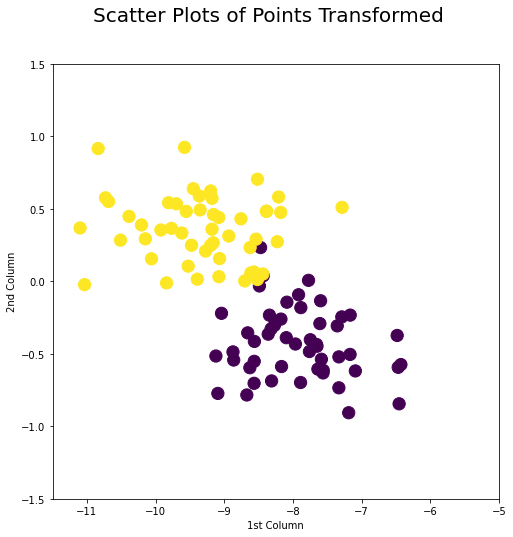

In [9]:
fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle("Scatter Plots of Points Transformed", size=20)
ax.set_xlim(-11.5,-5)
ax.set_ylim(-1.5,1.5)
ax.set(ylabel='2nd Column', xlabel='1st Column')
plt.scatter(X[:,0],X[:,1], marker='o', c=y, s=150)

## Q1-Part b
When we use only the two dimensions mentioned above, which ***subspace*** of the *original ${4}$-dimensional space* are we restricting/projecting our data to? You can respond to this question by giving ***basis vectors*** for this subspace.

Originally with this dataset, the idea is to obtain a model that is able to correctly classify the species of flowers coming from **three** different species using **four different features**. As a result of the formulation of the problem in this assignment, the data is only limited to **two** classes and hence it is a ***binary classification problem***. 

Under these assumptions, the idea is to correctly match the flower species via differentiating the flowers in dataset in **four dimensions**, four different characteristics and measures of the flowers in real life actually. The point of using a statistical learning model is to find the most important features and their influence in clustering the flowers by their correct classes. However, **Singular Value Decomposition** decomposes the matrix into its ***left and right singular vectors*** and ***associated singular values***. In this process, the values and vectors are not only matched with one another but also are ordered on the basis of how good they are able to approximate the original matrix. It can be stated that the singular vectors that hold most of the characteristic data resembling the structure of the original matrix are given more weight, in other words the *singular values* are also sequenced.

Delving deeper into the classification problem, under the assumption that the collected features at hand are good indicator of flower species, there is an expected amount of similarity between the original data matrix ${A}$ and the output matrix ${y}$. Because, if the features are good indicators of the species then there should be some degree of observed similarity and hence clustering between the flowers that belong to the **same species**. In other words, the difference in observed features are the source of the special characteristic of the matrix. If all the data collected were to include one and only species, then the matrix would contain less amount of variability between its rows, implying some repeated pattern that will make the matrix dull in a way. In short, the matrix ${A}$ has a secret structure that is in some kind of accordance with the stucture of the label matrix ${y}$.

Putting the information coming from the last two paragraphs together, if the matrix ${A}$ and ${y}$ resemble some kind of *similar* information on the space, then once decomposed the ***singular values and vectors*** should be ordered in a way that the original characteristics of the matrix ${A}$ are contained mostly in the *first* values and vectors. To put it differently, **SVD** helps finding the most important characteristics by **decomposing** and **re-arranging** the data matrix. The selected **two dimensions** from the original four are actually the most important features/dimensions in giving information of how the species are seperated. That is why when visualized on this ${2}$-D subspace, the clusters of the two different classes are obvious and the observed flowers are well seperated on the basis of this two features in ${x}$ and ${y}$ axes.

# Question 2

Let us now train a supervised model using our processed dataset ${X}$. We will use a *logistic regression model* for this task. For labels ${y \in \{0,1\}}$ and features ${x \in R^d}$, **logistic regression** can be defined as follows:

${y \approx \hat{y} = \sigma (\beta + \theta^Tx)}$

Here ${\beta \in R}$ and ${\theta \in R^d}$  are **model parameters** and ${\sigma}$ is the **sigmoid function**, ${\sigma(\alpha) = 1/(1 + e^{-\alpha})}$. In our application, we will ignore ${\beta}$ (usually called the **intercept parameter**) for simplicity, but note that this is not a common practice.
Previously, we used error metrics like ***mean square error (MSE)*** to evaluate *how wrong* a model is on a data set given its parameters. The error metrics used for training a model is called the ***loss function*** in machine learning. MSE is not a very good loss function in this case as we now try to predict *binary labels*. Therefore, we define a new loss function called the ***logistic loss***,

${L(\theta) = \frac{1}{N} \sum_{i = 1}^{N} {- y_i log(\hat{y_i}) - (1 - y_i) log(1 - \hat{y_i})}}$

Unfortunately, logistic regression with log loss does not have an analytical solution, thus we will use the ****gradient descent algorithm*** to find a solution. Gradient descent is an iterative algorithm and in its description, we will use ${\theta^{(k)}}$ to denote the parameters in the ${k^{th}}$ iteration of the algorithm. In gradient descent, for a randomly initialized ${\theta^{(0)}}$,

${\theta^{(k+1)} = \theta^{(k)} - \eta \sum_{i = 1}^{N} {\bigtriangledown_{\theta^{(k)}}}L(\theta^{(k)})}$

where ${\eta \in R > 0}$ is called the **learning rate** or **step size**. When run for a large enough number of iterations (call ${K}$), the model is expected to converge to a local optimum (given certain conditions beyond the scope of this course).

## Q2-Part a
**Derive** ${{\bigtriangledown_{\theta_i^{(k)}}}L(\theta^{(k)})}$ for our model. 

Note that here we are deriving ${{\bigtriangledown_{\theta_i^{(k)}}}}$ for a single parameter, the whole gradient would include the results of the operation conducted for all parameters.

${{\bigtriangledown_{\theta_i^{(k)}}}L(\theta^{(k)})}$ can be written multiplication of **two** partial derivatives by *chain rule*. Moreover, as ${L(\theta)}$ is a sum and the derivative acts linear on the summation so the final form of the **gradient** will contain summation over the indices of ${x}$. Thus, in the most closed form the **gradient** can be written as,

${{\bigtriangledown_{\theta^{(k)}}}L(\theta^{(k)}) = \sum_{i = 1}^{N} \frac{\partial L}{\partial \hat y_i} \frac{\partial \hat y_i}{\partial \theta}}$

Nonetheless, it is rather hard and can be a little ambiguous to obtain the formula for the whole vector ${\theta^{(k)}}$, and it is needed to find ${{\bigtriangledown_{\theta_j^{(k)}}}L(\theta^{(k)})}$. For this, the *similar* expression can be written but it should be kept in mind that ${j}$ is a fixed index of ${\theta^{(k)}}$ and the ${i}$ in summation is different and takes values from ${1}$ to ${N}$ for all ${x}$,

${{\bigtriangledown_{\theta_j^{(k)}}}L(\theta^{(k)}) = \sum_{i = 1}^{N} \frac{\partial L}{\partial \hat y_i} \frac{\partial \hat y_i}{\partial \theta_j}}$

The partial derivatives in this formula can be opened by keeping in mind that ${\frac{dlog(x)}{dx} = 1/x}$ and the derivative of ${\sigma (x)}$ is ${(\sigma (x)) (1-\sigma (x))}$. Once this is done,

${\frac{\partial L}{\partial \hat y_i} = \frac{1}{N} (-\frac{y_i}{\hat y_i} + \frac{1-y_i}{1-\hat y_i})}$ and

${\frac{\partial \hat y_i}{\partial \theta_j} = (\sigma (\theta^Tx)) (1-\sigma (\theta^Tx))(x_{i,j})}$, where ${x_{i,j}}$ is the value at the ${j^{th}}$ index of ${x_i}$ that is multiplied to ${\theta_j}$

If these are put into the summation formula,

${{\bigtriangledown_{\theta_j^{(k)}}}L(\theta^{(k)}) = \frac{1}{N}\sum_{i = 1}^{N} ((-\frac{y_i}{\hat y_i} + \frac{1-y_i}{1-\hat y_i})(\sigma (\theta^Tx)) (1-\sigma (\theta^Tx))(x_{i,1}))}$ can be obtained for ${j^{th}}$ element of ${\theta}$. Note that ${j^{th}}$ element is derived instead of ${i^{th}}$ to not further comlplicate the computations between two different ${i}$s coming from ${{\bigtriangledown_{\theta_i^{(k)}}}L(\theta^{(k)})}$ and ${x_i}$ and also ${\theta}$ are ${\theta^{(k)}}$.



## Q2-Part b
Initialize ${\theta^{(0)}}$ using Code Snippet 1. **Train** your algorithm for ${K = 10000}$ and ${\eta = 0.05}$ using JAX. In our example each row of ${X}$ corresponds to an ${x_i, i \in \{1, ..., 100\}}$. **Print** ${\theta^{(10000)}}$ and ${L(\theta^{(10000)})}$.

For *repeatability*, the seed is set and the ${\theta^{(0)}}$ is created as,

In [10]:
import numpy as np
np.random.seed(0)
theta_init = np.random.randn(2,1)/10

The **logistic regression model** and the **logartihmic loss function** is constructed using **JAX**,

In [11]:
def model(theta, x):
  return jnn.sigmoid(x@theta) #model is defined by sigmoid

def logloss(theta, y, x):
  return jnp.mean(-y*jnp.log(model(theta, x)) - (1-y)*(jnp.log(1-model(theta, x)))) #logistic loss function created

dlogloss = jax.value_and_grad(logloss) #gradient of loss function

A **gradient descent function** suitable for the *logistic regression model* that takes ${K}$ and ${\eta}$ as input can be written as,

In [12]:
def gradDesc(theta, y, x, steps, step_size):
  for i in range(steps):
    theta = theta - step_size*dlogloss(theta, y, x)[1] #theta vector is updated with gradient
  return theta

When applied,

In [13]:
theta_finit = gradDesc(theta_init, np.expand_dims(y.to_numpy(),1), X, 10000, 0.05) #with the inital values and parameters gradient descent is run

${\theta^{(10000)}}$ equals ${\begin{bmatrix} -0.041 \\ 10.125 \end{bmatrix}}$.

In [14]:
theta_finit

DeviceArray([[-0.04136017],
             [10.125258  ]], dtype=float32)

And ${L(\theta^{(10000)})}$ is found as ${0.13}$.

In [15]:
dlogloss(theta_finit, np.expand_dims(y.to_numpy(),1), X) #final loss of theta and gradient

(DeviceArray(0.13006037, dtype=float32), DeviceArray([[ 8.2552433e-06],
              [-5.5019567e-03]], dtype=float32))

## Q2-Part c
Estimate the labels for each observation using ${\hat y}$’s produced by your algorithm: Use ${0.5}$ as our ***decision threshold***, that is, predicting ${y}$ to be ${0}$ if ${\hat y < 0.5}$, and ${1}$ otherwise. Using your estimated labels, **compute and print an accuracy score** of your algorithm on the training data.

A simple **accuracy function** can be illustrated,

In [17]:
def accuracy(actual, pred):
  ncorrect = 0
  for i in range(len(actual)):
    if(actual[i,0]==np.around(pred[i,0], decimals=0)): #if actual equals prediction increase correct guesses
      ncorrect = ncorrect + 1
  return ncorrect/len(actual) #divide to get mean

The **accuracy score** can be calculated and found as ${0.96}$. ${96}$ of the observations have been correctly classified.

In [18]:
accuracy(np.expand_dims(y.to_numpy(),1), jnn.sigmoid(X@theta_finit)) #model and actual values are given

0.96

## Q2-Part d
Now we will visualize the **decision boundary** between two classes given our trained algorithm. Note that our trained algorithm produces a ${\hat y \in [0, 1]}$ for each input provided to it. Since we now have a trained algorithm and a decision threshold of ${0.5}$, we can look at ${\hat y}$ everywhere in the input space and visualize where it becomes ${0.5}$, effectively
demonstrating where our algorithm ***draws the line*** between the two classes.

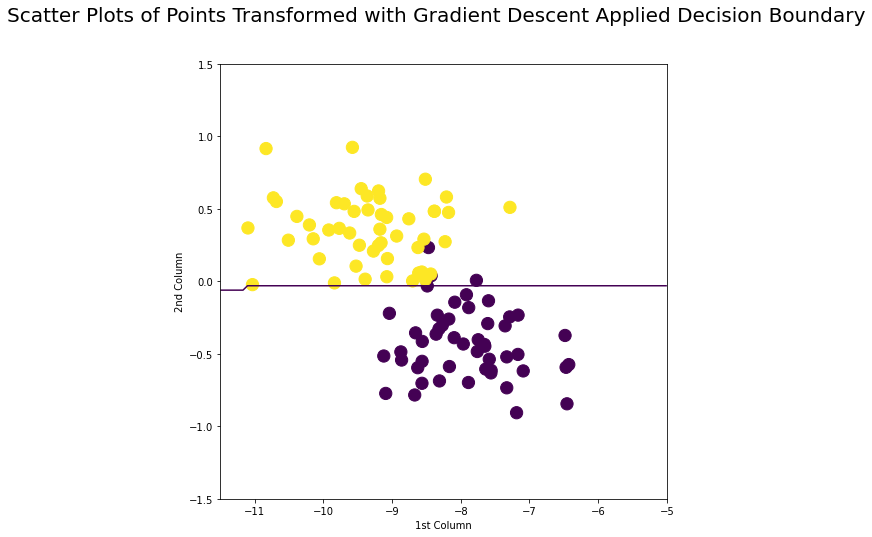

In [19]:
no_pts = 100
x_1 = np.linspace(-11.5, -5, no_pts)
x_2 = np.linspace(-1.5, 1.5, no_pts)
x_1_grid, x_2_grid = np.meshgrid(x_1, x_2)
p_grid = np.zeros((no_pts, no_pts))
for i in range(no_pts):
  for j in range(no_pts):
    x_1 = x_1_grid[i, j]
    x_2 = x_2_grid[i, j]
    p_grid[i, j] = np.around(jnn.sigmoid(np.array([x_1, x_2])@theta_finit), decimals=0)
fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle("Scatter Plots of Points Transformed with Gradient Descent Applied Decision Boundary", size=20)
ax.set_xlim(-11.5,-5)
ax.set_ylim(-1.5,1.5)
ax.set(ylabel='2nd Column', xlabel='1st Column')
plt.scatter(X[:,0],X[:,1], marker='o', c=y, s=150)
ax.contour(x_1_grid, x_2_grid, p_grid, levels=[.5])

# Question 3

We will now use a different algorithm to solve this problem, a **multilayer perceptron** (MLP, a.k.a. artificial neural network).This time the algorithm is defined as

${y \approx \hat{y} = \sigma (w_2^T \sigma (w_1x))}$,

where ${x \in R^d}$, ${W_1 \in R^{p x d}}$, ${w_2 \in R^p}$ and ${\sigma}$ is applied elementwise when applied to a vector. Expressed as such, our MLP has *one* ***hidden layer*** and *${p}$* ***hidden units***. We use gradient
descent with **log loss** to train the algorithm; think ${\theta = (W_1, w_2)}$ to see the correspondence with above.


## Q3-Part a
**Derive** the gradient for a single element of ${W_1}$ and ${w_2}$ which will be generically called ${W_{1,i,j}}$ and ${w_{2,i}}$. In other words **derive** ${\bigtriangledown W_{1,i,j}^{(k)}}$ and ${\bigtriangledown w_{2,i}^{(k)}}$.

The structure here is a little different to the structure in **2a** above but both ${\theta}$ and ${w_2}$ are vectors so the **gradients** coming from this two expressions will be alike and make use of *similar* derivations in application. So again with the summation sign and the chain rule from the relationship in the definition of ${w_2}$ with ${\hat y}$ and the loss function,

${{\bigtriangledown_{w_2^{(k)}}}L(W_1^{(k)}, w_2^{(k)}) = \sum_{i = 1}^{N} \frac{\partial L}{\partial \hat y_i} \frac{\partial \hat y_i}{\partial w_2}}$, where 

${\frac{\partial L}{\partial \hat y_i} = \frac{1}{N} (-\frac{y_i}{\hat y_i} + \frac{1-y_i}{1-\hat y_i})}$ just as above because of the **same** loss function used. And,

${\frac{\partial \hat y_i}{\partial w_2} = (\sigma (W_1x_i)) (1-\sigma (W_1x_i))(x_{i,1})\frac{\partial \hat W_1X_i}{\partial w_2}}$

When this is opened for a particular element ${j}$ of ${w_2}$,

${\bigtriangledown w_{2,j}^{(k)} = \frac{1}{N}\sum_{i = 1}^{N} ((-\frac{y_i}{\hat y_i} + \frac{1-y_i}{1-\hat y_i})(\sigma (W_1x_i)) (1-\sigma (W_1x_i))(W_1x_i)_j)}$


## Q3-Part b
*Let* ${p=5}$. *Initialize* all parameters, i.e. ${W_1^{(0)}}$ and ${w_2^{(0)}}$ using Code Snippet 3. *Train* your
algorithm for ${K=10000}$ and ${\eta=0.05}$ using JAX. **Print** ${W_1^{(10000)}}$, ${w_2^{(10000)}}$ and ${L(W_1^{(10000)}, w_2^{(10000)})}$.

For *repeatability*, the seed is set and ${W_1^{(0)}}$ and ${w_2^{(0)}}$ are created as,

In [20]:
import numpy as np
np.random.seed(0)
W_1_init = np.random.randn(5, 2)/10
w_2_init = np.random.randn(5, 1)/10

The **hidden layer logic of multilayer perceptron** and the suitable **logartihmic loss function** is constructed using **JAX**,

In [21]:
def hidden(beta, theta, x):
  return jnn.sigmoid(jnn.sigmoid(x@theta.T)@beta) #hidden layer is constructed

def logloss1(beta, theta, y, x):
  return jnp.mean(-y*jnp.log(hidden(beta, theta, x)) - (1-y)*(jnp.log(1-hidden(beta, theta, x)))) #regular loss function applied on MLP

dlogloss1_1 = jax.value_and_grad(logloss1)
dlogloss1_2 = jax.value_and_grad(logloss1, argnums=1) #gradient of the second argument

A **gradient descent function** suitable for the *multilayer perceptron* that takes ${K}$ and ${\eta}$ as input can be written,

In [24]:
def gradDescNN(beta, theta, y, x, steps, step_size):
  for i in range(steps):
    theta = theta - step_size*dlogloss1_2(beta, theta, y, x)[1] #updating theta as W1 
    beta = beta - step_size*dlogloss1_1(beta, theta, y, x)[1] #updating beta as w2
  return beta, theta

When applied,

In [26]:
w_2_finit, W_1_finit = gradDescNN(w_2_init, W_1_init, np.expand_dims(y.to_numpy(),1), X, 10000, 0.05)

${W_1^{(10000)} = \begin{bmatrix} 0.077 & -2.566 \\ -0.086 & 4.983 \\ 0.078 & -3.467 \\ 0.078 & -3.526 \\ -0.096 & 0.730\end{bmatrix}}$

In [27]:
W_1_finit

DeviceArray([[ 0.07700372, -2.566101  ],
             [-0.0857359 ,  4.983382  ],
             [ 0.07759133, -3.4665794 ],
             [ 0.07778258, -3.5262153 ],
             [-0.09612349,  0.73036647]], dtype=float32)

${w_2^{(10000)} = \begin{bmatrix} -3.128 \\ 5.492 \\ -4.102 \\ -4.175 \\ 0.868\end{bmatrix}}$

In [28]:
w_2_finit

DeviceArray([[-3.127946  ],
             [ 5.4920883 ],
             [-4.101766  ],
             [-4.1746426 ],
             [ 0.86792594]], dtype=float32)

Also, ${L(W_1^{(10000)}, w_2^{(10000)}) = 0.106}$,

In [29]:
dlogloss1_1(w_2_finit, W_1_finit, np.expand_dims(y.to_numpy(),1), X) #loss found

(DeviceArray(0.1064487, dtype=float32), DeviceArray([[ 0.00203334],
              [-0.00072648],
              [ 0.00229254],
              [ 0.00230935],
              [ 0.00050734]], dtype=float32))

## Q3-Part c
**Estimate** the *labels* for each observation similar to **2c**. Using your estimated labels, **compute** and **print** an ***accuracy score*** of your algorithm on the training data.

When trained, the **accuracy score** is ${0.97}$. Out of ${100}$ observations, **Multilayer Perceptron** has been able to classify ${97}$ of them correctly.

In [30]:
accuracy(np.expand_dims(y.to_numpy(),1), hidden(w_2_finit, W_1_finit, X)) 

0.97

The performance of **Multilayer Perceptron** is slightly better compared to that of **logistic regression**, after their training.

## Q3-Part d
**Plot** the *decision boundary* for the MLP solution, again you can make use of Code Snippet 2. **Compare** the result to the one you obtained with logistic regression. How/why are they similar/different?

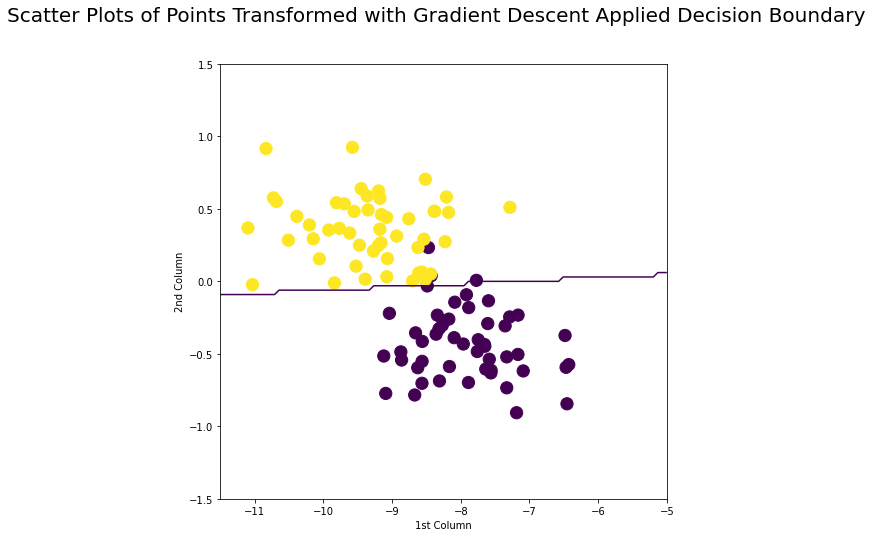

In [31]:
no_pts = 100
x_1 = np.linspace(-11.5, -5, no_pts)
x_2 = np.linspace(-1.5, 1.5, no_pts)
x_1_grid, x_2_grid = np.meshgrid(x_1, x_2)
p_grid = np.zeros((no_pts, no_pts))
for i in range(no_pts):
  for j in range(no_pts):
    x_1 = x_1_grid[i, j]
    x_2 = x_2_grid[i, j]
    p_grid[i, j] = np.around(hidden(w_2_finit, W_1_finit, np.array([[x_1, x_2]]))[:,0], decimals=0)
fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle("Scatter Plots of Points Transformed with Gradient Descent Applied Decision Boundary", size=20)
ax.set_xlim(-11.5,-5)
ax.set_ylim(-1.5,1.5)
ax.set(ylabel='2nd Column', xlabel='1st Column')
plt.scatter(X[:,0],X[:,1], marker='o', c=y, s=150)
ax.contour(x_1_grid, x_2_grid, p_grid, levels=[.5])

When visualized, the two boundaries seem to be *quite close* and *similar*. This can also be understood from the accuracy score as *logistic regression model* has only predicted one observation label wrong compared to the prediction performance of the *multilayer perception model*. 

There is a slight *difference* between the two decision boundaries as implied by the visualizations. The decision boundary of the multilayer perception (MLP) model seems to be better accommodated and adjusted compared to that of logistic regression model. It can be seen that the decision boundaries have *different* slopes compared to one another. Moreover, the decision boundary of the logistic regression seems of as a more flat line, depicting some form of more monotonous separation between two classes. Whereas, the decision boundary of the multilayer perceptron does have a more obvious slope and implies a change in the classification preference while taking into account the relationship between the two features depicted. In other words, the decision boundary of the multilayer perceptron reveals also that the two features at hand need to be increased or decreased together to classify the flower as coming from different species. 

Keeping these in mind, it can be stated that the decision boundary of the *multilayer perceptron model* is slightly more robust in this application compared to *logistic regression model*. The slope of the line is more obvious meaning that the parameters are better tuned. Though the ${K}$ and ${\eta}$ values are the **same** for both models, part of the difference in final performance can be attributed to the **difference in number of parameters**. With more parameters to be adjusted and take control of the line, the decision boundary of the MLP model is more differentiated as it also has the ability to yield non-linear decision boundaries. Ofcourse, this is probably only visible after certain number of iterations as it is some way harder to train and tune more parameters introduced by the model.

# Question 4

*Discuss* some aspects of the training process and decision making that follows:

## Q4-Part a
If we did not provide you with ${K}$ and ${\eta}$ values, what would be a reasonable way of selecting them?

The *parameter selection* and *tuning* is an important part of training learning algorithms. Most of the time, various learning parameters and combinations are tried repeatedly to check for the best performance in some cross-validation set. As can be understood, there is *not* a single rule for choosing the parameters as most of the time it is quite ambiguous to talk about the *perfect/correct* parameter itself. Nevertheless, there are some rules of thumb that can also be utilized in these models, 

The *learning parameters* (${\eta}$ and ${K}$ in this case) being too high may lead to two various unwanted behaviour. 

Firstly, after some number of iterations, the model may *overshoot* the local or global minimum point ??? of the objective function (log loss in this case). To put it differently, after some amount of decrease in the objective function, an iteration may send the next parameters ahead of their optimal values. Once transported to the other side of the minimum point, the direction of the gradient would change a lot as the gradient would still act as a pointer to the local or global minimum. Nevertheless, with such a *high* learning parameter value, the algorithm will again overshoot the minimum and the parameters would stay now very backwards of the minimum point. With more and more iterations, the parameters would keep on going to unwanted values and may never diverge to or close to their local or global minimum.

Another unwanted behavior may be the increased possibility of *overfitting*, that is the model capturing random fluctuations and co-occurences of *similar behavior* as important and revealing for the output. Statistically, **different samples** from the **same distribution** may have some amount of difference in their statistical figures. Applied for this problem, the whole distribution of the species does have a certain ***minimum*** point in which the features are correctly and optimally assigned coefficients stating their degree of relevance to the output. Nevertheless, when the sample at hand is considered, the story can be a little different. For example, because of data collecting a small amount of noise might have been added to the observed features or the sample might have been selected in such a way that an unignorable part of the observations have a similar amount of difference from the original feature values of the distribution. With these, it can be said that the **theoretical minimum** of the whole distribution and the **observed minimum** of the sample at hand are usually ***different*** compared to each other. With a *high* ${\eta}$ or ${K}$ value and depending on the structure of the model (which will be discussed further in **4c**), the coefficients of features can be tuned in so much accordance with the sample that the optimal tuning for the whole distribution can be missed. 

A small value of ${\eta}$ is also a burden as the learning can be slow and computationally hard, taking longer times and requiring more iterations, ${K}$ being bigger. The final model might be *underfitted*, approaching to the optimal point but not being able to get quite close to it. A similar scenario can also be applied for small ${K}$ and not high ${\eta}$, the training may stop at a very early point, *underfitting* the data.

Because of these reasons, it is good practice to monitor the training period using the loss function at some iterations. This way, a sudden increase in the loss function value can be seen and the parameters can be decreased. Also, if the loss function is staying nearly *constant* after some iterations, this can be interpreted as the minimum point and the training can be terminated to not result in *over-fitting*. Many of the time the researchers start with *high* ${\eta}$ values as the initial point is usually very far away from the minimum. Then, monitoring the decrease in loss values, they start decreasing the ${\eta}$ at further iterations to avoid the possibility of *overshoooting*. **Momentum** is also another variable that is helpful in controlling the movement in the function by keeping information coming from previous iterations and blending it with the current value of gradient vector. All in all, it can be stated that allowing for a medium number of iterations ${K}$ and starting for a relatively high value of ${\eta}$ while monitoring the **loss function** to manually adjust and decrease the value of ${\eta}$ in further iterations is a good practice.

For this problem originally, ${K = 1000}$ and ${\eta = 0.001}$, which resulted in a very poor training performance and *underfitting*, the current values of ${K = 10000}$ and ${\eta = 0.05}$ seems good. Nevertheless, from high accuracies even these might have led to *over-fitting*. These should be tested on a seperate test set. 

## Q4-Part b
If we wanted to do **model selection** between logistic regression and multilayer perceptron, what would be a correct way of doing this, in terms of ***generalization***?

In general, **Multilayer Perceptron Models** are more complex compared to **Logistic Regression** as they present better ability to adjust the feature co-efficients. These models, as explained throughly in **4c**, are able to yield more differentiated and even non-linear decision boundaries as they make use of not only the features seperately but also different cross-combinations of them. Because of this, depending on the structure and complexity of the problem **MLP** can be trained better and more elaborately. Nonetheless, there are also increased risks for *over-fitting* with these types of models.

In this problem, there are *two* features both seem as good indicators of the flower species even from the results obtained in **1a**. The problem is not complex and the features by themselves are good predictors so there is not much need for different combinations. The training results and the decision boundaries coming from both the models are very close. It can be understood that their performances will be similar for unseen data. This actually proves that for this problem, the complexity of the **MLP** does not add a lot more usefulness. Hence, for the problem at the hand with more data or higher ${\eta}$ and ${K}$ values, **MLP** may *overfit* the decision boundary, alhtough the *generalization abilities* are **very close** now. Therefore with more data or for higher ${\eta}$ and ${K}$ values, using **logistic regression** is suitable and good for the ability of generalization.

## Q4-Part c
What would be a correct way of selecting ${p}$ for the MLP, in terms of ***generalization***?

In general, there are more than one way to play with and find the optimal performance of the **multilayer perceptron models**. These include, changing learning parameters ${K}$ and ${\eta}$, changing number of hidden layers and changing the number of units/nodes within the hidden layers. All these might have different effects on the performance and the ability of generalization of the model. The exact influences depend on several other factors such as the initial and final value of parameter, the nature of the problem and given data and the amount of training data. Though there are no exact and definite rules, some things to consider while **choosing ${p}$** for good generalization can be stated and its applications to this model can be discussed.

The nodes in the hidden layer can be thought of as additional parameters to better scale and adjust the features of the observed data. In the feature space, there might be more than one combination of the features that is in some way revealing for the underlying structure of the problem at hand. For example, a feature may contain a certain amount of information by itself and another one may contain some other information that is also useful for the regression/classification task. Nevertheless, when combined the two features may act differently and indicate some other possibility for the observation. The nodes in the hidden layers are useful to create and find the useful combinations of the features that are the best at relating inputs to the outputs. To put it differently, the nodes yield different combinations of the features by amplifying some while dampening some. 

When thought this way, there is a strong relationship between the amount of features and the number of nodes in the hidden layer ${p}$. As the number of features that are useful for the model increases, there is the possiblity of more and more complex relations including very different combinations of these features. For small number of features on the other hand, the range of possible combinations are narrower. It can be stated that in general it is good to **increase** the parameter ${p}$ as the amount of features **increases**, but ofcourse with limits.

Putting it differently, using small amount of hidden units for a problem in which there are a lot of features considered useful is dangerous. In this way, it is guaranteed that there will be learning to some degree but not to an ideal point. The model will be **underfitted** because the complex nature of the problem resulted from different interactions of huge number of features will not be able to be accomodated and captured by the model at hand. Nevertheless, this is not dangerous in terms of generalization. Another point to be cautious on is to not increase the number of hidden units a lot. With lower number of features and too many nodes, some of the nodes will be adjusted to capture inconsistent combinations that are result of random fluctuations in life or data collecting. In other words, the model will try to explain the problem to the fullest while some nodes finding and learning random noises as useful. In this case, the model would lose the ability to **generalize** and hence perform poorly on the new data, detecting some noises and using them to predict the amount or label of the new observations wrongly.

Applied to this model, there are **two features**, which when plotted under **SVD** seem to reveal very obvious and basic **decision boundary** to the observers' naked eye. It can be stated that both the features are relevant to the classification problem and the relationship of the features with the outputs are not much complex. Hence, for this **two feature binary classification problem**, the underlying relationships are not very complicated and the model needed should also be not complicated. Using a ***single hidden layer*** with ${3-6}$ nodes seem reasonable as there are not a wide range of possiblities. Even from the results, altough **MLP** performed better, the performances have been quite close. This means that the nature of the problem is not very complex and even a **logistic regression**, using only the two features seperately is performing good. Nevertheless, it would be more healthy to compare the performances on an independent test set. But still, it can be claimed that to not use the ability to **generalize** the new data, the number of the nodes should not be increased too much and the current value of ${5}$ seems already very useful.